Working File for Group Project in Machine Learning 

# Introduction

With the increase of the world population and the increased need for food that this generates, the development of intensive cultures is always more important, the prediction of yields has become a financtial and social necessaty. However, with the development of more environmentally friendly practices and in particular the decrease in the use of pesticides, crop yields are often modified downwards. Extreme weather events such as droughts or late frosts also lead to a decrease in agricultural yields. The prediction of these yields is hard due to the high amound of uncertenty, such as droughts, pests and more. 
In our project we implemented different machine learning algorythms to tackle the difficulties of prediction.  
Such prediction could enable better management of agricultural land, and could also be an interesting tool for estimating prices, hunger, etc.

# Data

For this project we used a dataset from the FAO and the World Data Bank, containing the following information: country, year, yield, crops, rainfall, temperature and pesticides. The first step is to gather the data in one dataframe, being able to apply opearations on all the data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("data/Production_Crops_Livestock_E_All_Data.csv", encoding='latin-1') 
df2 = df
df2 = df2[df2["Area Code"]<1000] # removing the summerised Areas (Africa as a hole etc.)
df2 = df2.drop(["Area Code", "Area Code (M49)","Item Code (CPC)" ,"Item Code", "Element Code", "Element"], axis=1) # removing not used collums
df2 = df2.drop(df2.columns[df2.columns.str.endswith('F')], axis=1) # removing all collums wich say how the data was collectet. To reduce dataset complexity.
df2 = pd.melt(df2, id_vars=['Area', "Item",  "Unit"], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 
df2['Year'] = df2['Year'].str[1:] # removin the letter of befor the years
df2['Year'] = df2['Year'].astype(int)
df2 = df2.rename(index=str, columns={"Value": "yield_amound"})

df2.head(10)

,Area,Item,Unit,Year,yield_amound
0,Afghanistan,"Almonds, in shell",ha,1961,NaN
1,Afghanistan,"Almonds, in shell",hg/ha,1961,NaN
2,Afghanistan,"Almonds, in shell",tonnes,1961,NaN
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",ha,1961,NaN
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",hg/ha,1961,NaN
5,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",tonnes,1961,NaN
6,Afghanistan,Apples,ha,1961,2220.0
7,Afghanistan,Apples,hg/ha,1961,68018.0
8,Afghanistan,Apples,tonnes,1961,15100.0
9,Afghanistan,Apricots,ha,1961,4820.0


In [4]:
df2.tail(10)

,Area,Item,Element,Unit,Year,yield_amound
3737704,Zimbabwe,"Skim Milk & Buttermilk, Dry",Production,tonnes,2021,NaN
3737705,Zimbabwe,Sugar Crops Primary,Area harvested,ha,2021,47000.00
3737706,Zimbabwe,Sugar Crops Primary,Yield,hg/ha,2021,734043.00
3737707,Zimbabwe,Sugar Crops Primary,Production,tonnes,2021,3450000.00
3737708,Zimbabwe,"Treenuts, Total",Area harvested,ha,2021,3261.00
3737709,Zimbabwe,"Treenuts, Total",Yield,hg/ha,2021,21544.00
3737710,Zimbabwe,"Treenuts, Total",Production,tonnes,2021,7025.62
3737711,Zimbabwe,Vegetables Primary,Area harvested,ha,2021,35148.00
3737712,Zimbabwe,Vegetables Primary,Yield,hg/ha,2021,66770.00
3737713,Zimbabwe,Vegetables Primary,Production,tonnes,2021,234679.67


The first dataset contains information of the agricultural production per country and year. We keep only columns which have relevant information for us. For later it is relevant that there are a lot of differnet Products, and that the production is quantified in differend Units. The dataset ranges form 1961-2021.

In [5]:
dg = pd.read_csv("data/rain.csv", encoding='latin-1')
dg2=dg.drop(['Stop','Indicator','Code','IndicatorCode'], axis=1) 
dg2 = pd.melt(dg2, id_vars=['ï»¿Area'], var_name='Year', value_name='Value') # reshaping the df to create a single year collum 	
dg2=dg2.dropna()
dg2 = dg2.rename(index=str, columns={"Value": "rain"})
dg2 = dg2.rename(index=str, columns={"ï»¿Area": "Area"})
dg2['Year']=dg2['Year'].astype('int')


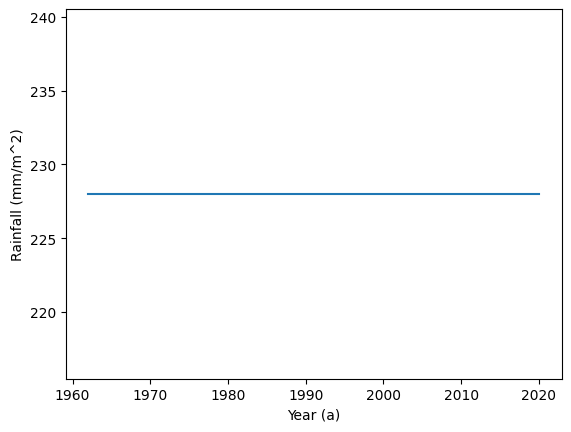

In [6]:
a = dg2[dg2["Area"] == "Iran"]
fig = sns.lineplot(data=a, x="Year", y="rain", markers=True)
plt.xlabel("Year (a)")
plt.ylabel("Rainfall (mm/m^2)")
plt.show(fig)

The secound dataset is describing the averige rainfall per square meter. Here only the relevant columns were kept. But the dataset has the problen that it has only limited meaningfullnes, due to the fact that much of the values were estimated and have the same value for most of the years, as seen above.   

In [16]:
dr = pd.read_csv("data/FAOSTAT_data_en_4-18-2023.csv", encoding='latin-1')
dr2 = dr
dr2 = dr2[dr2["Item"] == "Pesticides (total)"] #just using "Pesticides (total)" to reduce complexity
dr2 = dr2[dr2["Unit"] == "tonnes"] # just using "tonnes" to reduce complexity
dr2 = dr2.drop(["ï»¿Domain Code", "Area Code (M49)", "Item Code", "Element Code", "Year Code", "Flag", "Flag Description","Element", "Domain", "Item"], axis=1) # removing not used collums
dr2 = dr2.rename(index=str, columns={"Value": "pesticide_amound"})
dr2

,Area,Year,Unit,pesticide_amound
0,Albania,1990,tonnes,121.00
1,Albania,1991,tonnes,121.00
2,Albania,1992,tonnes,121.00
3,Albania,1993,tonnes,121.00
4,Albania,1994,tonnes,201.00
...,...,...,...,...
65752,Zimbabwe,2016,tonnes,2185.07
65753,Zimbabwe,2017,tonnes,2185.07
65754,Zimbabwe,2018,tonnes,2185.07
65755,Zimbabwe,2019,tonnes,2185.07


In the thired dataset we got information of the Pesticide use per country and year. The datlet was cleaned to only keep relevant columns. Relevant here is the timespan wich only goes from 1990 till 2020, this timespan is very much smaller that the information we have from other datasets. The includes total pesticide plus a seperation into different pesticides, such as herbicides etc.. To reduce the complexity of the proplem we use the total pesticide amounds.  

In [8]:
di = pd.read_csv("data/temp.csv", encoding='latin-1')
di2 = di.rename(index=str, columns={"year": "Year"}) # renaming collums 
di2 = di2.rename(index=str, columns={"country": "Area"}) #renaming collums 
di2 = di2.drop_duplicates(subset=['Area', "Year"], keep='last')
di2["Area"]=di2["Area"].replace(["United States", "Russia", "Bolivia"],["United States of America", "Russian Federation", "Bolivia (Plurinational State of)"]) #changing country names. 
di2

,Year,Area,avg_temp
165,1843,United Arab Emirates,26.04
166,1844,United Arab Emirates,26.26
167,1845,United Arab Emirates,NaN
168,1846,United Arab Emirates,NaN
169,1847,United Arab Emirates,NaN
...,...,...,...
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52


The 4th dataset inclueds information about the average temperature per country. In this dataset countrys had different names, so this problem had to be fixed. The timeframe is huge in the dataset. But no relevant to us, because no of our other datasets, have such a long range. 

In [21]:
merged = pd.merge(df2, dr2, on= ["Area", "Year"], how= "outer" )
merged = pd.merge(di2, merged, on= ["Area", "Year"], how= "outer")
merged = pd.merge(dg2, merged, on= ["Area", "Year"], how= "outer")

In [22]:
merged.dtypes

Area                 object
Year                  int64
rain                float64
avg_temp            float64
Item                 object
Unit_x               object
yield_amound        float64
Unit_y               object
pesticide_amound    float64
dtype: object

The datasets are merged on year and area using the outer fit. This secures that we are not loosing important Information, but this also means that the resulting dataset is huge. In the finaldataset we have a variety of columns, wich are described in the following . "Area" is a object column with the countrys. "Year" is an integer column with timeinformation with the resultion of years. "rain" is a continios column with average rainfall in mm/ m^2. "avg_temp" is a continous column which describes the average temperature. "Item" has information about the kind of agricultural prouct stored in a object column. "yield_amound" stores the amound of yield in a continoues column with the unit described in "Unit_x", which is a object colum with units such as "ha" or "tonnes". The column "pesticide_amound" contains the values of total pesticide amounds with the Unit "tonnes", described in "Unit_y".  

In [24]:
def get_na_distribution(dataframe):
    total_na = dataframe.isna().sum()
    percentage_na = (total_na / len(dataframe)) * 100
    na_distribution = pd.concat([total_na, percentage_na], axis=1, keys=['Total NA', 'Percentage NA'])
    na_distribution = na_distribution[na_distribution['Total NA'] > 0]
    na_distribution.sort_values(by='Total NA', ascending=False, inplace=True)
    return na_distribution

get_na_distribution(merged)

,Total NA,Percentage NA
Unit_y,2198556,58.238475
pesticide_amound,2198556,58.238475
avg_temp,1689138,44.744287
rain,1132787,30.006871
yield_amound,975983,25.853224
Item,23041,0.610343
Unit_x,23041,0.610343


A big Problem of the data set are the missing values. Especially the columns containing the information about the Pesticides hav a lot of missing values. This is caused mainly from the short timeframe. But the temperature data has also much missing data. (here more information why).

In General the most machine learning models work badly with missing data. To clean the dataset, eather (here answer to NAs)

In [25]:
merged.describe()

,Year,rain,avg_temp,yield_amound,pesticide_amound
count,3.775092e+06,2.642305e+06,2.085954e+06,2.799109e+06,1.576536e+06
mean,1.990353e+03,1.142553e+03,1.719064e+01,8.248359e+05,2.198202e+04
std,1.998773e+01,7.916616e+02,7.622080e+00,9.434097e+06,6.205351e+04
min,1.743000e+03,1.810000e+01,-1.213000e+01,0.000000e+00,3.000000e-02
25%,1.975000e+03,5.890000e+02,1.011000e+01,1.670000e+03,3.139000e+02
50%,1.991000e+03,9.000000e+02,1.744000e+01,1.530500e+04,2.485120e+03
75%,2.006000e+03,1.651000e+03,2.480000e+01,1.036820e+05,1.187192e+04
max,2.021000e+03,3.240000e+03,3.073000e+01,7.685942e+08,4.345408e+05


In [ ]:
2.642305e+06

When examining the distibution of the dataframe, it becomes clear, that some of the datacolumns are not normalised. There is a huge difference in size. While the mean of the rain data is at 

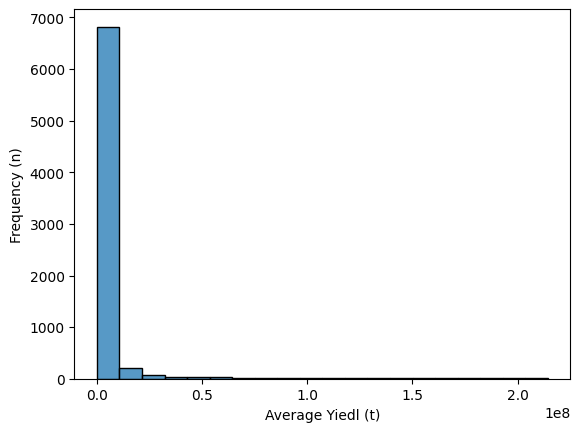

In [29]:
a = merged[merged["Unit_x"] == "tonnes"]
a = a[a["Item"] == "Rice"]
fig = sns.histplot(data = a, x= "yield_amound", bins = 20)
plt.xlabel("Average Yield (t)")
plt.ylabel("Frequency (n)")
plt.show(fig)

Espectially the yield amound has a huge variety. As shown exemplary for Rice in the graph above, the distribution is cleary more around the right side. The standart diviation is at 9.434097e+06 while the mean is only at 8.248359e+05. Depending on the algorythm used, it will be nessecary to standardise the data. 

In [ ]:
# Specify the file path and name for the CSV file
csv_file_path = 'data/file.csv'

# Use the 'to_csv' function to save the dataframe as a CSV file
merged.to_csv(csv_file_path, index=False)

To avoid having the need to load and merge the dataset every time, we are writing the merged dataset in a seperate CSV file, wich is then stored in the data folder and will be loaded afterwards.   

In [ ]:
data = pd.read_csv("data/file.csv", encoding='latin-1')

In [30]:
merged

,Area,Year,rain,avg_temp,Item,Unit_x,yield_amound,Unit_y,pesticide_amound
0,Afghanistan,1961,327.0,14.23,"Almonds, in shell",ha,NaN,NaN,NaN
1,Afghanistan,1961,327.0,14.23,"Almonds, in shell",hg/ha,NaN,NaN,NaN
2,Afghanistan,1961,327.0,14.23,"Almonds, in shell",tonnes,NaN,NaN,NaN
3,Afghanistan,1961,327.0,14.23,"Anise, badian, coriander, cumin, caraway, fenn...",ha,NaN,NaN,NaN
4,Afghanistan,1961,327.0,14.23,"Anise, badian, coriander, cumin, caraway, fenn...",hg/ha,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3775087,TÃ¼rkiye,2016,NaN,NaN,NaN,NaN,NaN,tonnes,50054.0
3775088,TÃ¼rkiye,2017,NaN,NaN,NaN,NaN,NaN,tonnes,54098.0
3775089,TÃ¼rkiye,2018,NaN,NaN,NaN,NaN,NaN,tonnes,60020.0
3775090,TÃ¼rkiye,2019,NaN,NaN,NaN,NaN,NaN,tonnes,51297.0


In [ ]:
datas = data[data["Unit_x"] == "hg/ha"]
datas = datas.drop("Domain", axis= 1)
datas = datas[datas["Item"] == "Rice"]
datas = datas.drop("Unit_y", axis= 1)
datas = datas.drop("Item_x", axis=1)
datas = datas.drop("Item_y", axis=1)
datas = datas.drop("Unit_x", axis=1)
datas = datas.drop_duplicates(subset= ["Area", "Year"])